In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from neuralforecast.losses.numpy import mae
from neuralforecast.core import NeuralForecast
from neuralforecast.models import Informer, Autoformer, FEDformer, PatchTST
from neuralforecast.models import LSTM, TCN, NHITS

In [3]:
data_gold = pd.read_csv('gold.csv')
data_silver = pd.read_csv('silver.csv')
data_platinum = pd.read_csv('platinum.csv')

In [4]:
def standard_scaler(data):
    mean = data['y'].mean()
    std = data['y'].std()
    data['y'] = (data['y']-mean)/std
    return mean, std, data

In [5]:
mean_gold, std_gold, data_gold = standard_scaler(data_gold)
mean_silver, std_silver, data_silver = standard_scaler(data_silver)
mean_platinum, std_platinum, data_platinum = standard_scaler(data_platinum)

In [6]:
data = pd.concat([data_gold,data_silver])
data

,ds,y,unique_id
0,0,-1.336501,gold
1,1,-1.323519,gold
2,2,-1.260577,gold
3,3,-1.291655,gold
4,4,-1.246415,gold
...,...,...,...
1285,1285,0.951773,silver
1286,1286,0.983087,silver
1287,1287,0.920697,silver
1288,1288,0.968616,silver


In [8]:
horizon = 10

In [9]:
%%capture
models_nn = [LSTM(h=horizon,                 # Forecasting horizon
                  input_size=30,         # Input size
                  max_steps=1000,               # Number of training iterations
                  val_check_steps=100,          # Compute validation loss every 100 steps
                  early_stop_patience_steps=3), # Stop training if validation loss does not improve
            TCN(h=horizon,
                  input_size=30,
                  max_steps=1000,
                  val_check_steps=100,
                  early_stop_patience_steps=3),
            NHITS(h=horizon,
                  input_size=30,
                  max_steps=1000,
                  val_check_steps=100,
                  early_stop_patience_steps=3)
            ]  

Global seed set to 1
Global seed set to 1
Global seed set to 1


In [10]:
nn = NeuralForecast(models=models_nn, freq='D')

data_nn = nn.cross_validation(df=data,
                              val_size=int(.1*len(data.ds.unique())),
                              test_size=int(.1*len(data.ds.unique())),
                              n_windows=None)

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

In [11]:
data_nn

,unique_id,ds,cutoff,LSTM,TCN,NHITS,y
0,gold,1161,1160,0.719938,0.704601,1.183843,1.150495
1,gold,1162,1160,0.748538,0.955728,1.236243,1.153642
2,gold,1163,1160,0.704447,0.961241,1.246861,1.181573
3,gold,1164,1160,0.726428,0.703237,1.268062,1.174098
4,gold,1165,1160,0.731988,0.781634,1.252827,1.215010
...,...,...,...,...,...,...,...
2395,silver,1285,1279,0.620137,0.560623,0.995197,0.951773
2396,silver,1286,1279,0.608675,0.534348,1.022537,0.983087
2397,silver,1287,1279,0.626911,0.485883,0.972620,0.920697
2398,silver,1288,1279,0.632100,0.508381,0.982717,0.968616


In [12]:
nn_predict = data_nn[data_nn['ds']-data_nn['cutoff']==horizon]
nn_predict

,unique_id,ds,cutoff,LSTM,TCN,NHITS,y
9,gold,1170,1160,0.733921,0.770926,1.324223,1.232320
19,gold,1171,1161,0.768715,0.773766,1.347447,1.209503
29,gold,1172,1162,0.756885,0.781220,1.320908,1.218158
39,gold,1173,1163,0.794506,0.788580,1.303669,1.186687
49,gold,1174,1164,0.767413,0.793988,1.272331,1.194554
...,...,...,...,...,...,...,...
2359,silver,1285,1275,0.521690,0.571010,1.149784,0.951773
2369,silver,1286,1276,0.531184,0.574937,1.113090,0.983087
2379,silver,1287,1277,0.407293,0.551137,0.996484,0.920697
2389,silver,1288,1278,0.339403,0.500022,0.898907,0.968616


In [13]:
nn_gold = nn_predict[nn_predict['unique_id']=='gold']
nn_silver = nn_predict[nn_predict['unique_id']=='silver']

In [14]:
nn_gold

,unique_id,ds,cutoff,LSTM,TCN,NHITS,y
9,gold,1170,1160,0.733921,0.770926,1.324223,1.232320
19,gold,1171,1161,0.768715,0.773766,1.347447,1.209503
29,gold,1172,1162,0.756885,0.781220,1.320908,1.218158
39,gold,1173,1163,0.794506,0.788580,1.303669,1.186687
49,gold,1174,1164,0.767413,0.793988,1.272331,1.194554
...,...,...,...,...,...,...,...
1159,gold,1285,1275,0.737622,0.745970,1.308950,1.207929
1169,gold,1286,1276,0.736098,0.754383,1.280728,1.216191
1179,gold,1287,1277,0.656872,0.739256,1.213055,1.196128
1189,gold,1288,1278,0.648118,0.719759,1.207472,1.228779


In [15]:
nn_gold[['LSTM','TCN','NHITS','y']] = nn_gold[['LSTM','TCN','NHITS','y']]*std_gold + mean_gold
nn_silver[['LSTM','TCN','NHITS','y']] = nn_silver[['LSTM','TCN','NHITS','y']]*std_silver + mean_silver

In [16]:
nf = NeuralForecast(models=models_nn, freq='D')

data_nn = nf.cross_validation(df=data_platinum,
                               val_size=int(.1*len(data_platinum.ds.unique())),
                               test_size=int(.1*len(data_platinum.ds.unique())),
                               n_windows=None)

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

In [17]:
data_nn

,unique_id,ds,cutoff,LSTM,TCN,NHITS,y
0,platinum,1402,1401,1.103270,1.614485,2.264925,1.355287
1,platinum,1403,1401,1.092131,1.557102,2.257949,1.483643
2,platinum,1404,1401,1.051369,1.487436,2.048597,1.321842
3,platinum,1405,1401,1.027876,1.438614,1.915712,1.302860
4,platinum,1406,1401,1.005163,1.314006,1.851157,1.235970
...,...,...,...,...,...,...,...
1455,platinum,1552,1546,-0.117447,-0.200704,0.220582,0.300418
1456,platinum,1553,1546,-0.099070,-0.210110,0.108258,0.379963
1457,platinum,1554,1546,-0.097450,-0.201087,-0.008377,0.288667
1458,platinum,1555,1546,-0.100735,-0.165660,-0.032733,0.242567


In [18]:
nn_platinum = data_nn[data_nn['ds']-data_nn['cutoff']==horizon]
nn_platinum

,unique_id,ds,cutoff,LSTM,TCN,NHITS,y
9,platinum,1411,1401,0.922562,1.137289,0.814569,1.720469
19,platinum,1412,1402,0.960174,1.149400,0.441551,1.807245
29,platinum,1413,1403,1.026294,1.213780,0.256708,1.543302
39,platinum,1414,1404,0.958570,1.163061,0.430431,1.504433
49,platinum,1415,1405,0.935531,1.194335,0.641739,1.207949
...,...,...,...,...,...,...,...
1419,platinum,1552,1542,-0.180866,-0.250211,-0.130810,0.300418
1429,platinum,1553,1543,-0.337167,-0.267923,-0.143516,0.379963
1439,platinum,1554,1544,-0.020853,-0.215990,0.102641,0.288667
1449,platinum,1555,1545,0.006859,-0.146722,0.182045,0.242567


In [19]:
nn_platinum[['LSTM','TCN','NHITS','y']] = nn_platinum[['LSTM','TCN','NHITS','y']]*std_platinum + mean_platinum

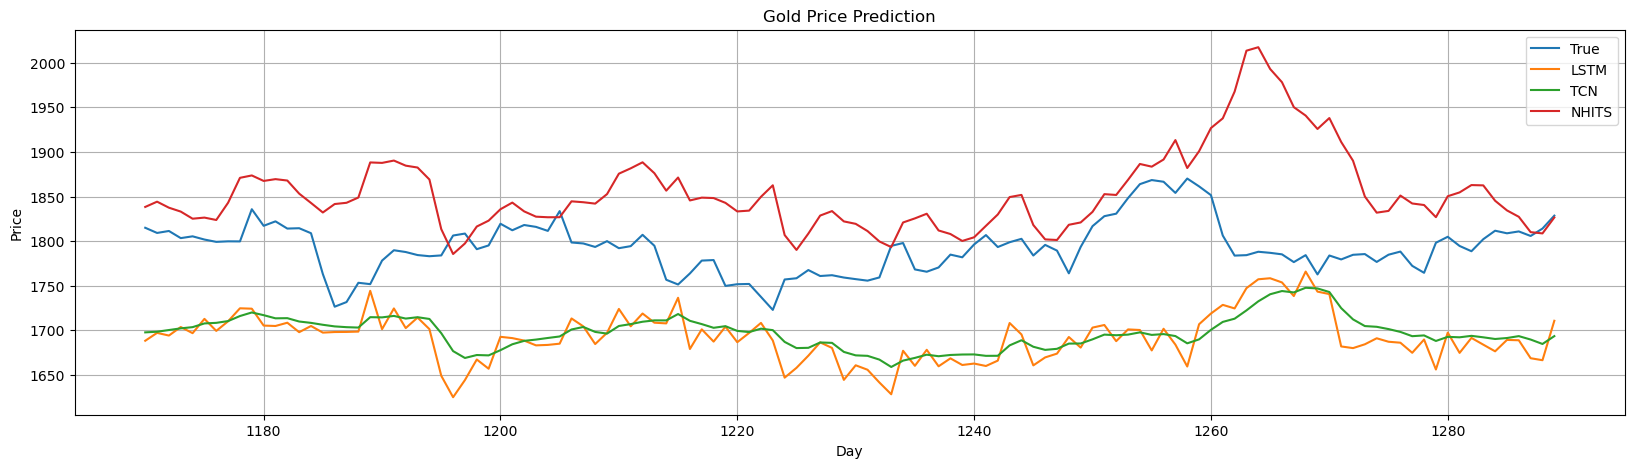

In [20]:
plt.figure(figsize=(20,5))
plt.plot(nn_gold['ds'], nn_gold['y'], label='True')
plt.plot(nn_gold['ds'], nn_gold['LSTM'], label='LSTM')
plt.plot(nn_gold['ds'], nn_gold['TCN'], label='TCN')
plt.plot(nn_gold['ds'], nn_gold['NHITS'], label='NHITS')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Gold Price Prediction')
plt.grid()
plt.legend()
plt.show()

In [21]:
mae_lstm = mae(nn_gold['y'], nn_gold['LSTM'])
mae_tcn = mae(nn_gold['y'], nn_gold['TCN'])
mae_nhits = mae(nn_gold['y'], nn_gold['NHITS'])

print(f'LSTM: {mae_lstm:.3f}')
print(f'TCN: {mae_tcn:.3f}')
print(f'NHITS: {mae_nhits:.3f}')

LSTM: 100.430
TCN: 95.276
NHITS: 61.590


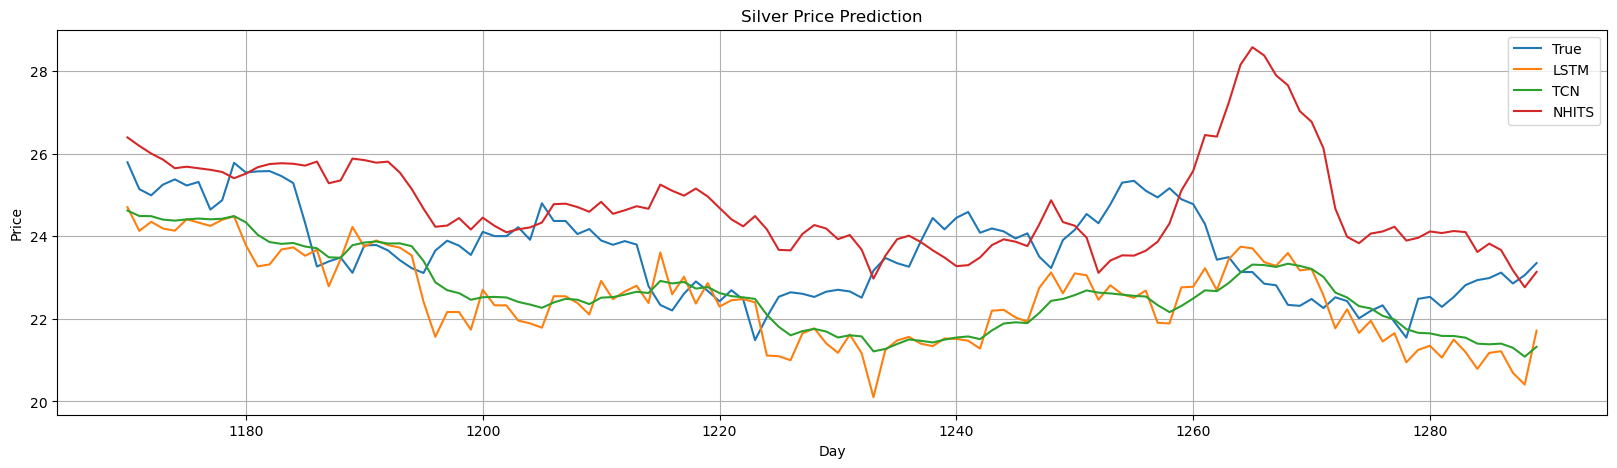

In [22]:
plt.figure(figsize=(20,5))
plt.plot(nn_silver['ds'], nn_silver['y'], label='True')
plt.plot(nn_silver['ds'], nn_silver['LSTM'], label='LSTM')
plt.plot(nn_silver['ds'], nn_silver['TCN'], label='TCN')
plt.plot(nn_silver['ds'], nn_silver['NHITS'], label='NHITS')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Silver Price Prediction')
plt.grid()
plt.legend()
plt.show()

In [23]:
mae_lstm = mae(nn_silver['y'], nn_silver['LSTM'])
mae_tcn = mae(nn_silver['y'], nn_silver['TCN'])
mae_nhits = mae(nn_silver['y'], nn_silver['NHITS'])

print(f'LSTM: {mae_lstm:.3f}')
print(f'TCN: {mae_tcn:.3f}')
print(f'NHITS: {mae_nhits:.3f}')

LSTM: 1.332
TCN: 1.194
NHITS: 1.406


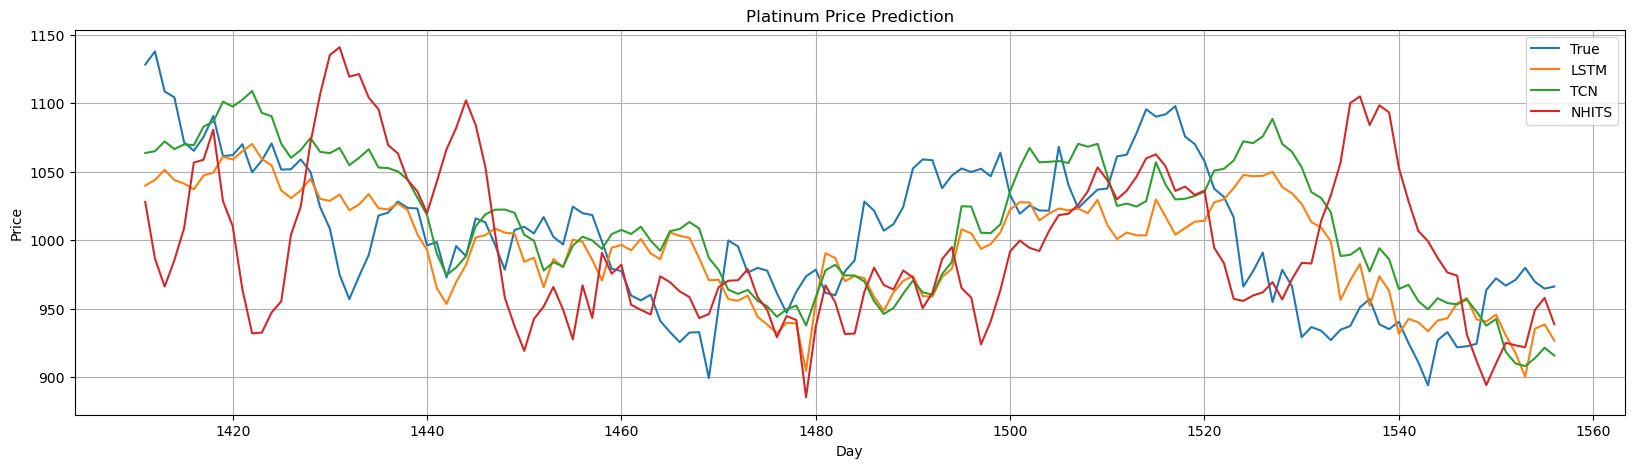

In [24]:
plt.figure(figsize=(20,5))
plt.plot(nn_platinum['ds'], nn_platinum['y'], label='True')
plt.plot(nn_platinum['ds'], nn_platinum['LSTM'], label='LSTM')
plt.plot(nn_platinum['ds'], nn_platinum['TCN'], label='TCN')
plt.plot(nn_platinum['ds'], nn_platinum['NHITS'], label='NHITS')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Platinum Price Prediction')
plt.grid()
plt.legend()
plt.show()

In [25]:
mae_lstm = mae(nn_platinum['y'], nn_platinum['LSTM'])
mae_tcn = mae(nn_platinum['y'], nn_platinum['TCN'])
mae_nhits = mae(nn_platinum['y'], nn_platinum['NHITS'])

print(f'LSTM: {mae_lstm:.3f}')
print(f'TCN: {mae_tcn:.3f}')
print(f'NHITS: {mae_nhits:.3f}')

LSTM: 36.848
TCN: 41.365
NHITS: 56.014


In [26]:
%%capture
models_tf = [Informer(h=horizon,                 # Forecasting horizon
                      input_size=30,         # Input size
                      max_steps=1000,               # Number of training iterations
                      val_check_steps=100,          # Compute validation loss every 100 steps
                      early_stop_patience_steps=3), # Stop training if validation loss does not improve
             Autoformer(h=horizon,
                        input_size=30,
                        max_steps=1000,
                        val_check_steps=100,
                        early_stop_patience_steps=3),
             PatchTST(h=horizon,
                        input_size=30,
                        max_steps=1000,
                        val_check_steps=100,
                        early_stop_patience_steps=3),
             ]

Global seed set to 1
Global seed set to 1
Global seed set to 1


In [27]:
tf = NeuralForecast(models=models_tf, freq='D')

data_tf = tf.cross_validation(df=data,
                               val_size=int(.1*len(data.ds.unique())),
                               test_size=int(.1*len(data.ds.unique())),
                               n_windows=None)

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

In [28]:
data_tf

,unique_id,ds,cutoff,Informer,Autoformer,PatchTST,y
0,gold,1161,1160,1.277027,1.217333,1.130698,1.150495
1,gold,1162,1160,1.310659,1.235667,1.157786,1.153642
2,gold,1163,1160,1.269833,1.267262,1.195443,1.181573
3,gold,1164,1160,1.292024,1.295211,1.194480,1.174098
4,gold,1165,1160,1.307170,1.353353,1.212037,1.215010
...,...,...,...,...,...,...,...
2395,silver,1285,1279,0.953428,1.163714,0.816663,0.951773
2396,silver,1286,1279,1.077392,1.208863,0.808630,0.983087
2397,silver,1287,1279,0.997188,1.276439,0.817789,0.920697
2398,silver,1288,1279,1.033480,1.323295,0.823246,0.968616


In [29]:
tf_predict = data_tf[data_tf['ds']-data_tf['cutoff']==horizon]
tf_predict

,unique_id,ds,cutoff,Informer,Autoformer,PatchTST,y
9,gold,1170,1160,1.378978,1.485781,1.229968,1.232320
19,gold,1171,1161,1.380720,1.549770,1.232561,1.209503
29,gold,1172,1162,1.400316,1.603674,1.170929,1.218158
39,gold,1173,1163,1.408669,1.430389,1.167118,1.186687
49,gold,1174,1164,1.400373,1.422967,1.156232,1.194554
...,...,...,...,...,...,...,...
2359,silver,1285,1275,1.126676,1.294079,0.885092,0.951773
2369,silver,1286,1276,1.151468,1.091460,0.839706,0.983087
2379,silver,1287,1277,1.071723,1.231294,0.780491,0.920697
2389,silver,1288,1278,1.000530,1.388911,0.650321,0.968616


In [30]:
tf_gold = tf_predict[tf_predict['unique_id']=='gold']
tf_silver = tf_predict[tf_predict['unique_id']=='silver']

In [31]:
tf_gold

,unique_id,ds,cutoff,Informer,Autoformer,PatchTST,y
9,gold,1170,1160,1.378978,1.485781,1.229968,1.232320
19,gold,1171,1161,1.380720,1.549770,1.232561,1.209503
29,gold,1172,1162,1.400316,1.603674,1.170929,1.218158
39,gold,1173,1163,1.408669,1.430389,1.167118,1.186687
49,gold,1174,1164,1.400373,1.422967,1.156232,1.194554
...,...,...,...,...,...,...,...
1159,gold,1285,1275,1.412177,1.279469,1.071392,1.207929
1169,gold,1286,1276,1.424498,1.162472,1.079526,1.216191
1179,gold,1287,1277,1.361804,0.876439,1.073141,1.196128
1189,gold,1288,1278,1.346477,0.985249,1.036397,1.228779


In [32]:
tf_gold[['Informer','Autoformer','PatchTST','y']] = tf_gold[['Informer','Autoformer','PatchTST','y']]*std_gold + mean_gold
tf_silver[['Informer','Autoformer','PatchTST','y']] = tf_silver[['Informer','Autoformer','PatchTST','y']]*std_silver + mean_silver

In [33]:
tf = NeuralForecast(models=models_tf, freq='D')

data_tf = tf.cross_validation(df=data_platinum,
                               val_size=int(.1*len(data_platinum.ds.unique())),
                               test_size=int(.1*len(data_platinum.ds.unique())),
                               n_windows=None)

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

In [34]:
data_tf

,unique_id,ds,cutoff,Informer,Autoformer,PatchTST,y
0,platinum,1402,1401,1.208938,1.603085,1.241800,1.355287
1,platinum,1403,1401,1.210588,1.600835,1.231349,1.483643
2,platinum,1404,1401,1.223658,1.563203,1.285243,1.321842
3,platinum,1405,1401,1.306968,1.502344,1.320012,1.302860
4,platinum,1406,1401,1.200101,1.474039,1.330435,1.235970
...,...,...,...,...,...,...,...
1455,platinum,1552,1546,0.194055,0.206755,0.040299,0.300418
1456,platinum,1553,1546,0.143135,0.234345,0.029900,0.379963
1457,platinum,1554,1546,0.048288,0.286853,0.067819,0.288667
1458,platinum,1555,1546,0.025922,0.310277,0.081308,0.242567


In [35]:
tf_platinum = data_tf[data_tf['ds']-data_tf['cutoff']==horizon]
tf_platinum

,unique_id,ds,cutoff,Informer,Autoformer,PatchTST,y
9,platinum,1411,1401,1.127584,1.358184,1.247272,1.720469
19,platinum,1412,1402,1.107042,1.213624,1.429636,1.807245
29,platinum,1413,1403,1.102602,1.154465,1.600812,1.543302
39,platinum,1414,1404,1.100983,1.445323,1.473027,1.504433
49,platinum,1415,1405,1.066635,1.594432,1.434212,1.207949
...,...,...,...,...,...,...,...
1419,platinum,1552,1542,-0.031399,0.753846,-0.043324,0.300418
1429,platinum,1553,1543,-0.131421,1.018897,-0.142143,0.379963
1439,platinum,1554,1544,-0.005335,0.745997,0.081720,0.288667
1449,platinum,1555,1545,-0.129218,0.619259,0.104874,0.242567


In [36]:
tf_platinum[['Informer','Autoformer','PatchTST','y']] = tf_platinum[['Informer','Autoformer','PatchTST','y']]*std_platinum + mean_platinum

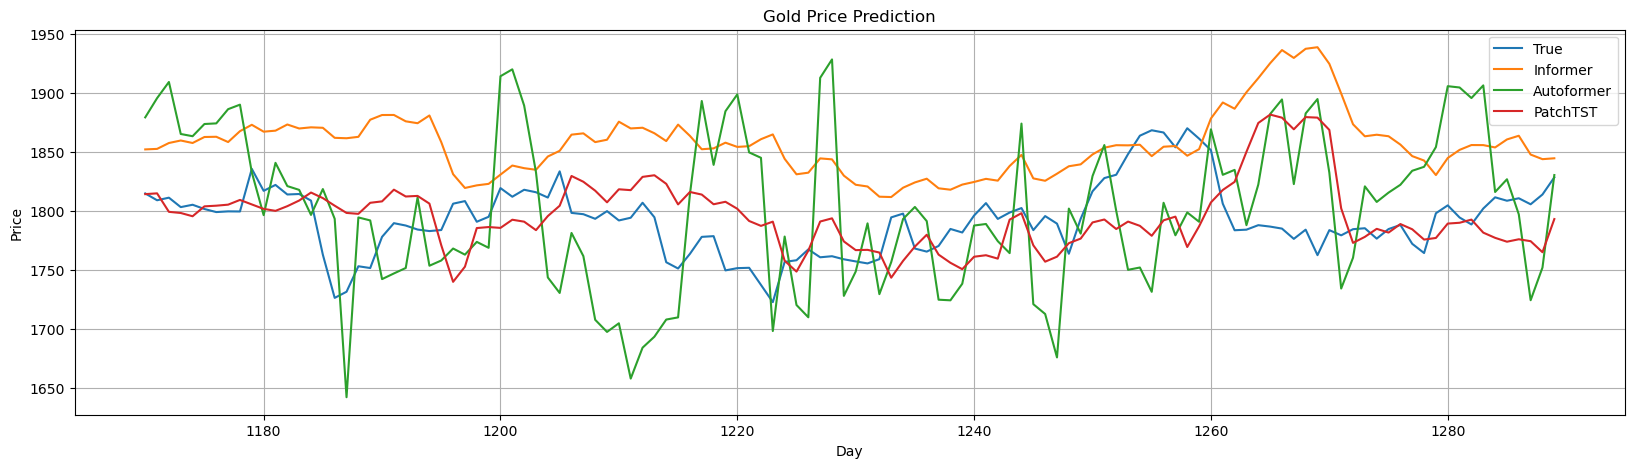

In [37]:
plt.figure(figsize=(20,5))
plt.plot(tf_gold['ds'], tf_gold['y'], label='True')
plt.plot(tf_gold['ds'], tf_gold['Informer'], label='Informer')
plt.plot(tf_gold['ds'], tf_gold['Autoformer'], label='Autoformer')
plt.plot(tf_gold['ds'], tf_gold['PatchTST'], label='PatchTST')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Gold Price Prediction')
plt.grid()
plt.legend()
plt.show()

In [38]:
mae_lstm = mae(tf_gold['y'], tf_gold['Informer'])
mae_tcn = mae(tf_gold['y'], tf_gold['Autoformer'])
mae_nhits = mae(tf_gold['y'], tf_gold['PatchTST'])

print(f'Informer: {mae_lstm:.3f}')
print(f'Autoformer: {mae_tcn:.3f}')
print(f'PatchTST: {mae_nhits:.3f}')

Informer: 65.012
Autoformer: 57.967
PatchTST: 32.709


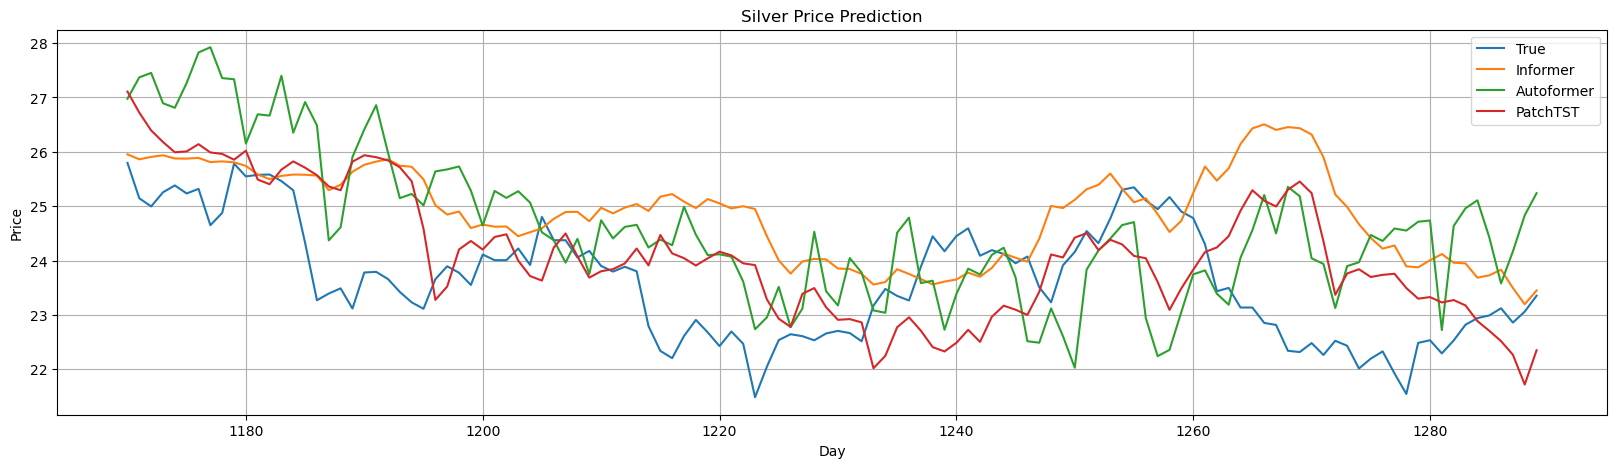

In [39]:
plt.figure(figsize=(20,5))
plt.plot(tf_silver['ds'], tf_silver['y'], label='True')
plt.plot(tf_silver['ds'], tf_silver['Informer'], label='Informer')
plt.plot(tf_silver['ds'], tf_silver['Autoformer'], label='Autoformer')
plt.plot(tf_silver['ds'], tf_silver['PatchTST'], label='PatchTST')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Silver Price Prediction')
plt.grid()
plt.legend()
plt.show()

In [40]:
mae_lstm = mae(tf_silver['y'], tf_silver['Informer'])
mae_tcn = mae(tf_silver['y'], tf_silver['Autoformer'])
mae_nhits = mae(tf_silver['y'], tf_silver['PatchTST'])

print(f'Informer: {mae_lstm:.3f}')
print(f'Autoformer: {mae_tcn:.3f}')
print(f'PatchTST: {mae_nhits:.3f}')

Informer: 1.330
Autoformer: 1.407
PatchTST: 1.076


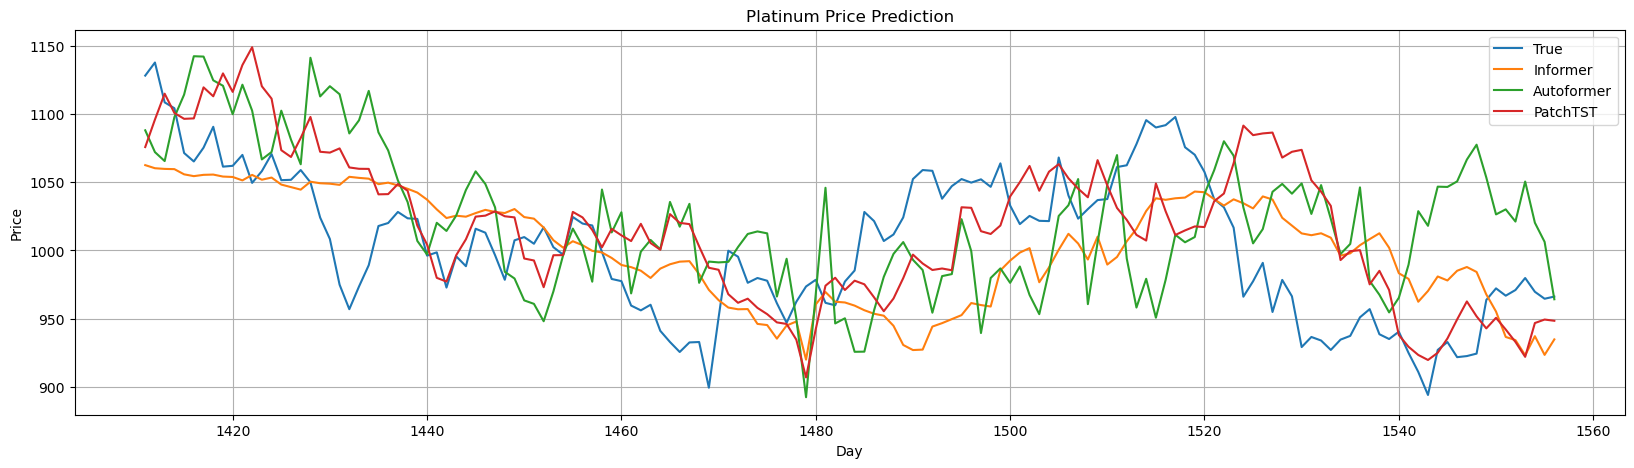

In [41]:
plt.figure(figsize=(20,5))
plt.plot(tf_platinum['ds'], tf_platinum['y'], label='True')
plt.plot(tf_platinum['ds'], tf_platinum['Informer'], label='Informer')
plt.plot(tf_platinum['ds'], tf_platinum['Autoformer'], label='Autoformer')
plt.plot(tf_platinum['ds'], tf_platinum['PatchTST'], label='PatchTST')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Platinum Price Prediction')
plt.grid()
plt.legend()
plt.show()

In [42]:
mae_lstm = mae(tf_platinum['y'], tf_platinum['Informer'])
mae_tcn = mae(tf_platinum['y'], tf_platinum['Autoformer'])
mae_nhits = mae(tf_platinum['y'], tf_platinum['PatchTST'])

print(f'Informer: {mae_lstm:.3f}')
print(f'Autoformer: {mae_tcn:.3f}')
print(f'PatchTST: {mae_nhits:.3f}')

Informer: 42.358
Autoformer: 56.101
PatchTST: 40.737
